In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'source')))
from imblearn.over_sampling import SMOTE
from evaluator import * 
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import torch
import torch
import torch.nn as nn
import torch.optim as optim

with open('../data/data-challenge-student.pickle', 'rb') as handle:
    # dat = pickle.load(handle)
    dat = pd.read_pickle(handle)

In [2]:
X = dat['X_train']
Y = dat['Y']
S = dat['S_train']

In [3]:
# how many ones in S 
print("S ones :",S.sum())
print("S zeros :",S.shape[0] - S.sum())
print("X shape :",X.shape)
print("Y shape :",Y.shape)
print("S shape :",S.shape)

S ones : 12793
S zeros : 14956
X shape : (27749, 768)
Y shape : (27749,)
S shape : (27749,)


In [4]:
# number of classes
print("Y unique :",Y.unique().shape[0])
print("Y value counts :",Y.value_counts())

Y unique : 28
Y value counts : profession_class
21    8285
19    2918
2     2273
18    1715
11    1402
13    1316
22    1295
26    1121
6      994
25     948
1      703
14     542
12     524
20     504
9      499
24     467
0      387
5      386
7      262
4      206
3      184
16     178
15     136
27     115
8      107
17      97
10      93
23      92
Name: count, dtype: int64


In [5]:
print("X head :",X.head())
print("Y head :",Y.head())
print("S head :",S.head())

X head :             0         1         2         3         4         5         6    \
28553 -0.107712  0.202686 -0.036410 -0.538686  0.162234 -0.109034 -0.075343   
6286   0.056359  0.003188 -0.726052 -0.616777  0.064091 -0.068786  0.384864   
36284 -0.331249  0.210670 -0.202662 -0.654994  0.307785 -0.254564 -0.165728   
12083 -0.565799  0.118481  0.185003 -0.692792 -0.056820  0.039130  0.241766   
7859  -0.669160 -0.052143 -0.708578 -0.159049 -0.273591  0.059959 -0.134847   

            7         8         9    ...       758       759       760  \
28553  0.202060 -0.120114 -0.540793  ...  0.058022 -0.117150  0.684212   
6286   0.363644 -0.285173 -0.430806  ... -0.049452 -0.587354 -0.004443   
36284  0.540352 -0.184862 -0.696042  ...  0.069515 -0.030068  0.616826   
12083 -0.113560 -0.138898 -0.768206  ... -0.071413 -0.310701  0.157026   
7859   0.045078 -0.308037 -0.585879  ... -0.018836 -0.473991  0.177165   

            761       762       763       764       765       766      

In [6]:
# dataframe of X
print("X describe :",X.describe())

X describe :                 0             1             2             3             4    \
count  27749.000000  27749.000000  27749.000000  27749.000000  27749.000000   
mean      -0.336415     -0.000947     -0.517365     -0.503902     -0.056925   
std        0.241738      0.248391      0.394988      0.259865      0.260024   
min       -1.650025     -1.140967     -1.930083     -1.560696     -1.098962   
25%       -0.490549     -0.166887     -0.780339     -0.670340     -0.237157   
50%       -0.333451     -0.000796     -0.509399     -0.494708     -0.062312   
75%       -0.176314      0.173093     -0.251268     -0.332255      0.111903   
max        0.643118      1.039149      0.745597      0.514842      1.146440   

                5             6             7             8             9    \
count  27749.000000  27749.000000  27749.000000  27749.000000  27749.000000   
mean      -0.028903      0.214925      0.304056     -0.136354     -0.273534   
std        0.248630      0.252762     

In [7]:
# print features of x correlated with y > 0.9
correlation = X.corrwith(Y)
print("correlation with Y > 0.5 :",correlation[correlation > 0.5])

correlation with Y > 0.5 : Series([], dtype: float64)


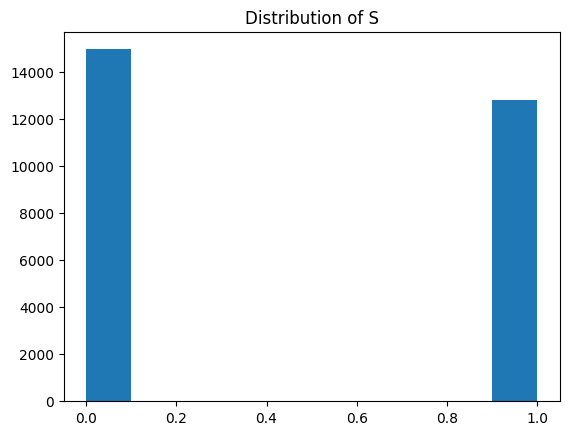

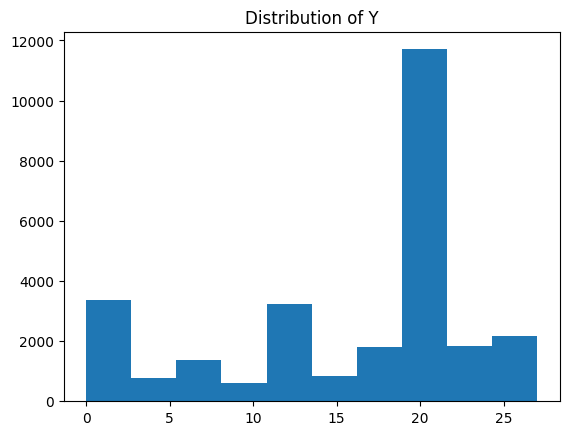

In [8]:
# visualize distribution of data
plt.hist(S)
plt.title('Distribution of S')
plt.show()

# visualize distribution of data
plt.hist(Y)
plt.title('Distribution of Y')
plt.show()

In [12]:
# Balance classes with SMOTE
sm = SMOTE(random_state=42)
# add S as a column to X
X['S'] = S
X.columns = X.columns.astype(str)
print(X.head())
X_res, Y_res = sm.fit_resample(X, Y)
print("X_res shape :",X_res.shape)
print("Y_res shape :",Y_res.shape)
# Extract S from X
S_res = X_res['S']
X_res = X_res.drop(columns=['S'])
print(X_res.columns)

              0         1         2         3         4         5         6  \
28553 -0.107712  0.202686 -0.036410 -0.538686  0.162234 -0.109034 -0.075343   
6286   0.056359  0.003188 -0.726052 -0.616777  0.064091 -0.068786  0.384864   
36284 -0.331249  0.210670 -0.202662 -0.654994  0.307785 -0.254564 -0.165728   
12083 -0.565799  0.118481  0.185003 -0.692792 -0.056820  0.039130  0.241766   
7859  -0.669160 -0.052143 -0.708578 -0.159049 -0.273591  0.059959 -0.134847   

              7         8         9  ...       759       760       761  \
28553  0.202060 -0.120114 -0.540793  ... -0.117150  0.684212 -0.456693   
6286   0.363644 -0.285173 -0.430806  ... -0.587354 -0.004443 -0.924459   
36284  0.540352 -0.184862 -0.696042  ... -0.030068  0.616826 -0.952147   
12083 -0.113560 -0.138898 -0.768206  ... -0.310701  0.157026 -0.691291   
7859   0.045078 -0.308037 -0.585879  ... -0.473991  0.177165 -0.409756   

            762       763       764       765       766       767  S  
28553  0.

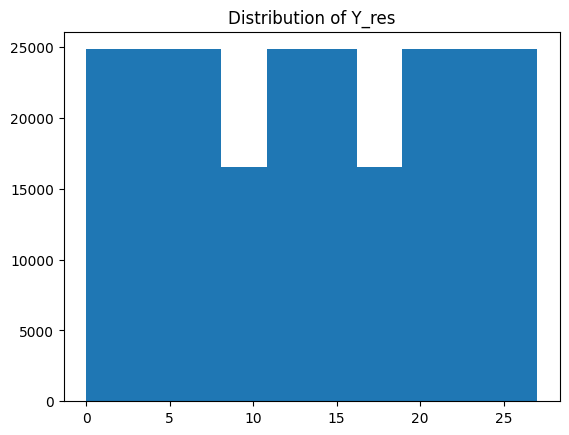

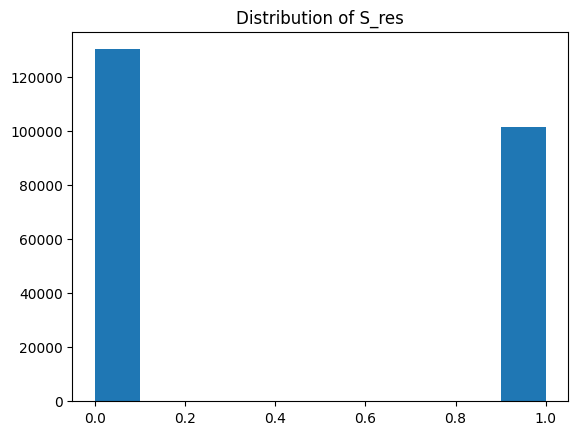

In [13]:
plt.hist(Y_res)
plt.title('Distribution of Y_res')
plt.show()

plt.hist(S_res)
plt.title('Distribution of S_res')
plt.show()


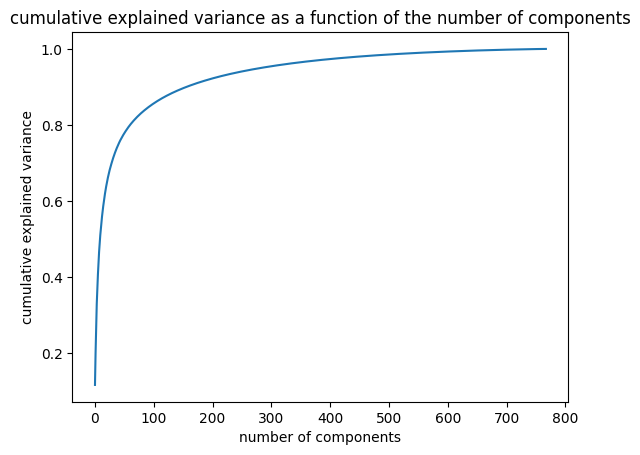

In [ ]:
# Feature selection with pca
pca = PCA()
pca.fit(X_res)
# cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(cumulative_explained_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('cumulative explained variance as a function of the number of components')
plt.show()

In [ ]:
# hose components that explain 95% of the variance
pca = PCA(n_components=0.95)
pca.fit(X_res)
X_pca = pca.transform(X_res)
print("X_pca shape :",X_pca.shape)
# split data into train and test
X_train, X_test, Y_train, Y_test, S_train, S_test = train_test_split(X_pca, Y_res, S_res, test_size=0.3, random_state=42)
# convert all to numpy array
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()


# convert to tensor
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
Y_train = torch.from_numpy(Y_train)
Y_test = torch.from_numpy(Y_test)


In [14]:
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)
print("Y_train shape :",Y_train.shape)
print("Y_test shape :",Y_test.shape)

X_train shape : torch.Size([162386, 284])
X_test shape : torch.Size([69594, 284])
Y_train shape : torch.Size([162386])
Y_test shape : torch.Size([69594])


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.MLP = nn.Sequential(
            nn.Linear(284, 200),
            nn.ReLU(),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 28),
            nn.Softmax()
        )

    def forward(self, x):
        logits = self.MLP(x)
        return logits

loss_fn = nn.CrossEntropyLoss()

# Create an instance of the neural network
model = NeuralNetwork().to(device)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
def train(model, optimizer, loss_fn, inputs, labels, n_epochs):
    model.train()
    inputs = inputs.to(device)
    labels = labels.to(device)

    for epoch in range(n_epochs):
        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Example usage
inputs = X_train.to(device)
labels = Y_train.to(device)
n_epochs = 3300
train(model, optimizer, loss_fn, inputs, labels, n_epochs)


Epoch 0, Loss: 3.3322277069091797
Epoch 1, Loss: 3.330561399459839
Epoch 2, Loss: 3.3263821601867676
Epoch 3, Loss: 3.314913272857666
Epoch 4, Loss: 3.2833242416381836
Epoch 5, Loss: 3.246073007583618
Epoch 6, Loss: 3.1955370903015137
Epoch 7, Loss: 3.144015312194824
Epoch 8, Loss: 3.0844504833221436
Epoch 9, Loss: 3.0185036659240723
Epoch 10, Loss: 2.961442708969116
Epoch 11, Loss: 2.908762216567993
Epoch 12, Loss: 2.8659353256225586
Epoch 13, Loss: 2.8132948875427246
Epoch 14, Loss: 2.7952988147735596
Epoch 15, Loss: 2.752304792404175
Epoch 16, Loss: 2.734588384628296
Epoch 17, Loss: 2.7071330547332764
Epoch 18, Loss: 2.6855907440185547
Epoch 19, Loss: 2.680046558380127
Epoch 20, Loss: 2.6631853580474854
Epoch 21, Loss: 2.655107259750366
Epoch 22, Loss: 2.6472153663635254
Epoch 23, Loss: 2.6410930156707764
Epoch 24, Loss: 2.635834217071533
Epoch 25, Loss: 2.629591226577759
Epoch 26, Loss: 2.625103235244751
Epoch 27, Loss: 2.6227428913116455
Epoch 28, Loss: 2.618642568588257
Epoch 29,

In [21]:
# Test the model
def test(model, inputs, labels):
    model.eval()
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(inputs)
    _, Y_pred = torch.max(outputs, 1)
    Y_pred = Y_pred.cpu().numpy()
    # Compute the accuracy
    eval_scores, confusion_matrices_eval = gap_eval_scores(Y_pred, Y_test, S_test, metrics=['TPR'])
    final_score = (eval_scores['macro_fscore']+ (1-eval_scores['TPR_GAP']))/2
    print(final_score)
    return eval_scores, confusion_matrices_eval

inputs = X_test.to(device)
labels = Y_test.to(device)
test(model, inputs, labels)

ValueError: Found input variables with inconsistent numbers of samples: [69594, 11893]

In [20]:
# Load the "true" test data
X_test = dat['X_test']
S_test = dat['S_test'] 
# Classify the provided test data with you classifier
X_test = pca.transform(X_test)
X_test = torch.tensor(X_test)
inputs = X_test.to(device)
outputs = model(inputs)
_, y_test = torch.max(outputs, 1)
y_test = y_test.cpu().numpy()
results=pd.DataFrame(y_test, columns= ['score'])

results.to_csv("Data_Challenge_MDI_341.csv", header = None, index = None)
# np.savetxt('y_test_challenge_student.txt', y_test, delimiter=',')

/home/aleksander/.local/share/virtualenvs/Data_Challenge-2KO3xTh2/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/aleksander/.local/share/virtualenvs/Data_Challenge-2KO3xTh2/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
